In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from librosa import load
from functools import partial
from IPython.display import Audio, display

# Functions

In [3]:
def time_bins(X, window_size, overlap):
    """
    Create an overlapped version of X
    Parameters
    ----------
    X : ndarray, shape=(n_samples,)
        Input signal to window and overlap
    window_size : int
        Size of windows to take
    window_step : int
        Step size between windows
    Returns
    -------
    X_strided : shape=(nun_windows, window_size)
        2D array of overlapped X
    """
    if window_size % 2 != 0:
        raise ValueError(f"Window size must be even! Recieved {window_size}")
    padding = np.zeros(int(window_size - len(X) % window_size))
    X = np.concatenate((X, padding))
    slide_length = int(window_size*(1-overlap))
    num_windows = (len(X) - window_size) // slide_length
    out = np.ndarray((num_windows,window_size),dtype = X.dtype)

    for i in range(num_windows):
        start = i * slide_length
        out[i] = X[start : start+window_size]
    return out

def stft(X, fftsize=512, win_mult=2, overlap=0.5, normalize=False):
    """
    Compute STFT for 1D real valued input X
    """
    win_size = fftsize*win_mult
    X = time_bins(X, win_size, overlap)
    hanning = .54 - .46 * np.cos(2 * np.pi * np.arange(win_size) / (win_size - 1))
    X = X * hanning.reshape((1, win_size))
    X = np.fft.fft(X).T
    #X = np.fft.fft(X)[:win_size//2].T
    if normalize: X*=256/X.max()
    return X

def istft(X, fftsize=512, win_mult=2, overlap=0.5, normalize=False):
    #X = np.concatenate((X, X[::-1]), axis=0)
    X = np.fft.ifft(X.T).real
    win_size = len(X[0])
    slider_length = int(win_size*(1-overlap))

    hanning = .54 - .46 * np.cos(2 * np.pi * np.arange(win_size) / (win_size - 1))
    X = X/hanning.reshape((1, win_size))

    inv_audio = X[0][0:win_size-slider_length]
    for i in range(len(X)):
        inv_audio = np.concatenate((inv_audio, X[i][-slider_length:]))
    return(inv_audio)

# Plotters

## Color Map

In [4]:
class ColorMeshPlotter():
    def __init__(self, **kwargs):
        self._plot = partial(plt.pcolormesh, **kwargs)
    def __call__(self, spec, figsize=None):
        params = matplotlib.rcParams
        if figsize: params['figure.figsize'] = figsize
        self._plot(abs(spec[:spec.shape[0]//2]))
        params['figure.figsize'] = matplotlib.rcParamsDefault['figure.figsize']

In [5]:
cdict = {'red': ((0.0, 0.0156, 0.0156),
                 (0.3, 1.0, 1.0),
                 (0.6, 1.0, 1.0),
                 (1.0, 1.0, 1.0)),
         'green': ((0.0, 0.125, 0.125),
                   (0.3, 1.0, 1.0),
                   (0.6, 1.0, 1.0),
                   (1.0, 1.0, 0.0)),
         'blue': ((0.0, 0.25, 0.25),
                  (0.3, 1.0, 1.0),
                  (0.6, 0.17, 0.17),
                  (1.0, 0.0, 0.0))}
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)

## Linear Spectrograms

In [6]:
audio,sr = load("/home/holydemon/GitHub/SpeechSep/Audios/Audio7.mp3")
seconds = 5
spec = stft(audio[:sr*seconds], win_mult=2)

/home/holydemon/.anaconda3/envs/fastai_dev/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(1024, 158)


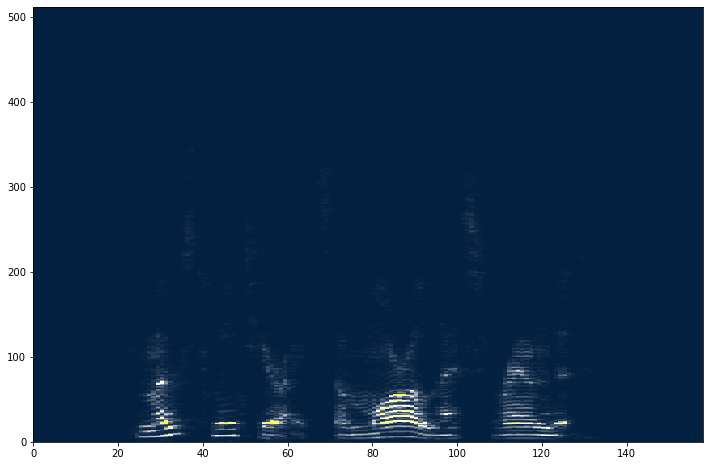

In [7]:
specshow = ColorMeshPlotter(cmap=my_cmap)
display(Audio(audio, rate=sr))
print(spec.shape)
specshow(spec, [12,8])

## Mixed Audio

In [8]:
audio,sr = load("/home/holydemon/GitHub/SpeechSep/Audios/Audio2.mp3")
seconds = 5
spec = stft(audio[:sr*seconds], win_mult=2)

/home/holydemon/.anaconda3/envs/fastai_dev/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [9]:
audio,sr = load("/home/holydemon/GitHub/voiceseparation/clips/Audio6.mp3")
seconds = 5
spec = stft(audio[:sr*seconds], win_mult=2)

/home/holydemon/.anaconda3/envs/fastai_dev/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(1024, 136)


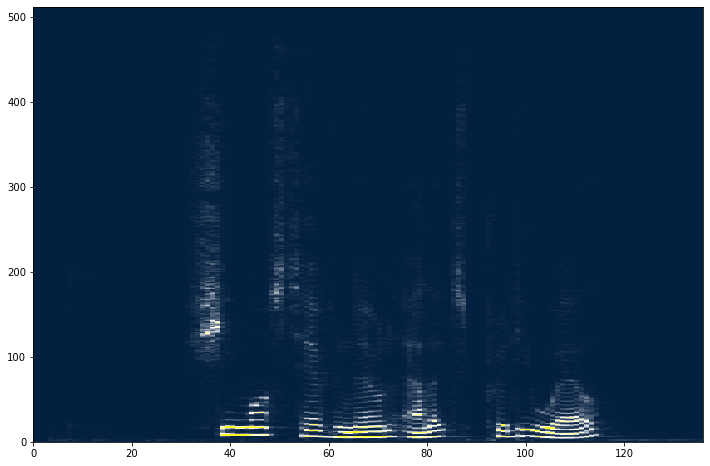

In [13]:
specshow = ColorMeshPlotter(cmap=my_cmap)
display(Audio(audio, rate=sr))
print(spec.shape)
specshow(spec, [12,8])

(1024, 136)


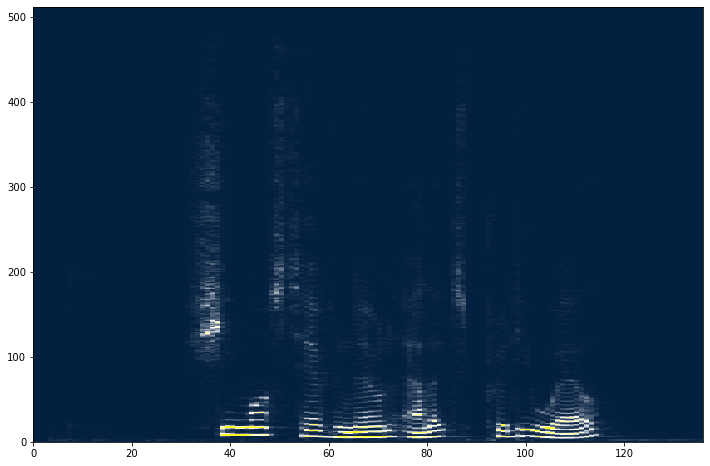

In [10]:
specshow = ColorMeshPlotter(cmap=my_cmap)
display(Audio(audio, rate=sr))
print(spec.shape)
specshow(spec, [12,8])

(1024, 136)


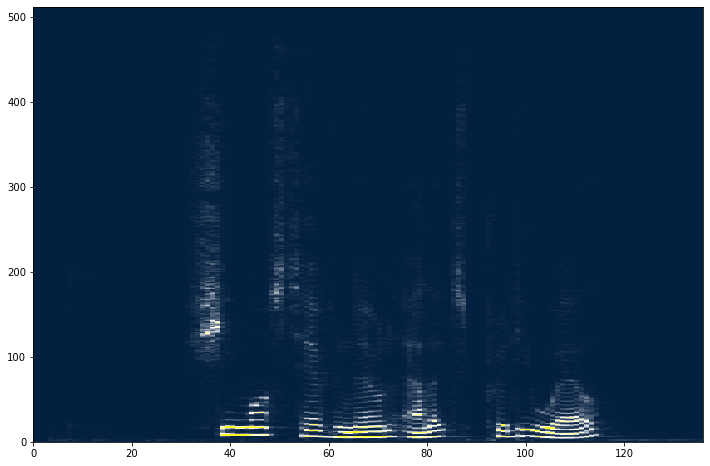

In [11]:
specshow = ColorMeshPlotter(cmap=my_cmap)
display(Audio(audio, rate=sr))
print(spec.shape)
specshow(spec, [12,8])